**Assignment 3**

GitHub User Name: lbelmanw

Email: livia_belman-wells@brown.edu

Worked with Angela White and Justin Voelker

In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import NewLog as lm

In [35]:
#ODE solver and pendulum method from Particle1D
#I really like my file organization and for unknown reasons jupyter doesn't like me recreating particle in this folder

#!/usr/bin/python
from scipy.integrate import odeint
import matplotlib.pyplot as plt # for plotting          
import numpy as np

class Particle (object):

    """Class that describes particle"""
    m = 1.0

    def __init__(self, x0=1.0, v0=0.0,  tf = 10.0, dt = 0.001):
        self.x = x0
        self.v = v0
        self.t = 0.0
        self.tf = tf
        self.dt = dt

        self.tlabel = 'time (s)'
        self.xlabel = 'x (m)'
        self.vlabel = 'v (m/s)'

        npoints = int(tf/dt) # always starting at t = 0.0
        self.npoints = npoints
        self.tarray = np.linspace(0.0, tf,npoints, endpoint = True) # include final timepoint
        self.xv0 = np.array([self.x, self.v]) # NumPy array with initial position and velocity

    def F(self, x, v, t):
        # The force on a free particle is 0
        return array([0.0])

    def Euler_step(self): 
        """
        Take a single time step using Euler method
        """
        
        a = self.F(self.x, self.v, self.t) / self.m
        self.x += self.v * self.dt
        self.v += a * self.dt
        self.t += self.dt

    def RK4_step(self):
        """
        Take a single time step using RK4 midpoint method
        """

        a1 = self.F(self.x, self.v, self.t) / self.m
        k1 = np.array([self.v, a1])*self.dt

        a2 = self.F(self.x+k1[0]/2, self.v+k1[1]/2, self.t+self.dt/2) / self.m
        k2 = np.array([self.v+k1[1]/2 ,a2])*self.dt
        
        a3 = self.F(self.x+k2[0]/2, self.v+k2[1]/2, self.t+self.dt/2) / self.m
        k3 = np.array([self.v+k2[1]/2, a3])*self.dt
        
        a4 = self.F(self.x+k3[0], self.v+k3[1], self.t+self.dt) / self.m
        k4 = np.array([self.v+k3[1], a4])*self.dt

        self.x += (k1[0]+ k4[0])/6 + (k2[0] + k3[0])/3
        self.v += (k1[1]+ k4[1])/6 + (k2[1] + k3[1])/3
        
        self.t += self.dt

    def Euler_trajectory(self):
        """
        Loop over all time steps to construct a trajectory with Euler method
        Will reinitialize euler trajectory everytime this method is called
        """
        
        x_euler = []
        v_euler = []
        
        while(self.t < self.tf-self.dt/2):
            v_euler.append(self.v)
            x_euler.append(self.x)
            self.Euler_step()
        
        self.x_euler = np.array(x_euler)
        self.v_euler = np.array(v_euler)


    def RK4_trajectory(self):  # calculate trajectory as before
        # need to reinitialize if you want to call this method and others
        x_RK4 = []
        v_RK4 = []
        for ii in range(self.npoints):
            x_RK4.append(self.x)
            v_RK4.append(self.v)
            self.RK4_step()

        self.x_RK4 = np.array(x_RK4)
        self.v_RK4 = np.array(v_RK4)

    def scipy_trajectory(self):
        """calculate trajectory using SciPy ode integrator"""
        self.xv = odeint(self.derivative, self.xv0, self.tarray)

    def derivative(self, xv, t):
        """right hand side of the differential equation"""
        x =xv[0]
        v =xv[1]
        a = self.F(x, v, t) / self.m
        return np.ravel(np.array([v, a]))

    def results(self):
        """
        Print out results in a nice format
        """

        
        print('\n\t Position and Velocity at Final Time:')
        print('Euler:')
        print('t = {} x = {} v = {}'.format(self.t, self.x , self.v))
        
        if hasattr(self, 'xv'):
            print('SciPy ODE Integrator:')
            print('t = {} x = {} v = {}'.format(self.tarray[-1], self.xv[-1, 0], self.xv[-1,1]))

    def plot(self, pt = 'trajectory'):
        """
        Make nice plots of our results
        """

        fig1 = plt.figure()
        ax1 = fig1.add_subplot(111)
        
        
        if hasattr(self,'xv'):

            if pt == 'trajectory':
                ax1.plot(self.tarray, self.xv[:, 0], "k", label = 'odeint')
            if pt == 'phase':
                ax1.plot(self.xv[:, 0], self.xv[:, 1], "k",'.', label = 'odeint')
        
        if hasattr(self,'x_euler'):

            if pt == 'trajectory':
                ax1.plot(self.tarray, self.x_euler, "b", label = 'euler')
            if pt == 'phase':
                ax1.plot(self.x_euler, self.v_euler, "b",'.', label = 'euler')
        
        if hasattr(self,'x_RK4'):

            if pt == 'trajectory':
                ax1.plot(self.tarray, self.x_RK4, "r", label = 'RK4')
            if pt == 'phase':
                ax1.plot(self.x_RK4, self.v_RK4, "b",'.', label = 'euler')
       
        if pt == 'trajectory':
            ax1.set_xlabel(self.tlabel)
            ax1.set_ylabel(self.xlabel)
        
        if pt == 'phase':
            ax1.set_xlabel(self.xlabel)
            ax1.set_ylabel(self.vlabel)


class Pendulum(Particle):

    """Subclass of Particle Class that describes a pendulum in a harmonic potential"""
    def __init__(self, l = 9.8, nu = 0, Fd  = 0.0, omega_d = 0.0, m = 1.0, x0 = 0.0 ,v0 = 0.0, tf = 50.0, dt = 0.001):
       
        super().__init__(x0,v0,tf,dt) 
        # for pendulum x = theta [-pi, pi]
        g = 9.8
        omega0 = np.sqrt(g/l)
        
        self.l = l # length
        self.m = m # mass
        self.Fd = Fd # driving force, in units of mg
        self.omega_d = omega_d #driving frequency, in units of omega0
        self.nu = nu # viscous damping 
        self.omega0 = omega0 # natural frequency

        self.tlabel = 'time ($1/\omega_0$)'
        self.xlabel = '$\\theta$ (radians)'
        self.vlabel = '$\omega$ (radians/s)'

    # overload method to wrap x between [-pi,pi]
    def RK4_step(self):  
        Particle.RK4_step(self)
        if self.x > np.pi:
            self.x -= 2*np.pi
        elif self.x < -np.pi:
            self.x += 2*np.pi

    # overload method to wrap x between [-pi,pi]
    def scipy_trajectory(self):
        Particle.scipy_trajectory(self)
        
        x = self.xv[:,0]
        x_new = np.zeros(np.shape(x))
        x_new[0] = x[0]

        # find change in x between each point
        dx = np.diff(x)
        nx = np.shape(x)[0]
        
        for ii in range(1,nx):
            # reconstruct x array, checking for out of range values
            x_new[ii] = x_new[ii-1]+dx[ii-1]
            if x_new[ii] > np.pi:
                x_new[ii] -= 2*np.pi
            
            elif x_new[ii] < -np.pi:
                x_new[ii] += 2*np.pi
        
        self.xv_unwrap = 1.0*self.xv
        self.xv[:,0] = x_new
    
    def F(self, x, v, t):
        g = 9.8 

        F = self.Fd*np.cos(self.omega_d*t) - self.nu*v - g/self.l*np.sin(x)
        
        return F


**Problem 1**

0.352768662576


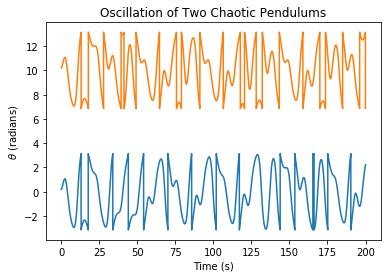

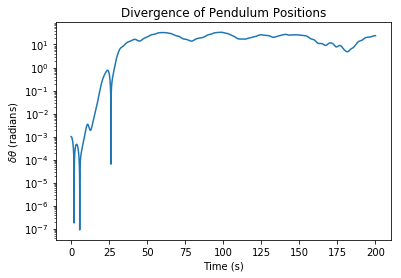

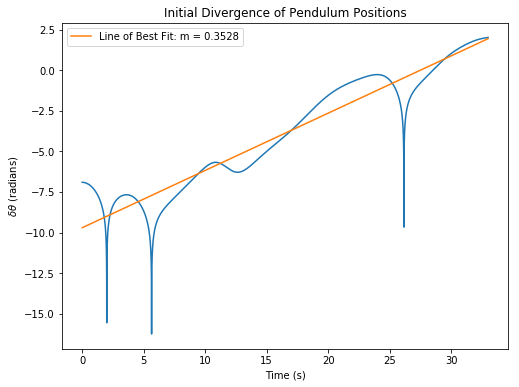

In [60]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
p1 = Pendulum(nu = 0.5, Fd = 1.1, omega_d = 0.6 , x0 = 0.200, tf = 200)
p1.scipy_trajectory()
plt.plot(p1.tarray, p1.xv[:,0])

p2 = Pendulum(nu = 1/2, Fd = 1.1, omega_d = 0.6 , x0 = 0.201, tf = 200)
p2.scipy_trajectory()
plt.plot(p2.tarray, p2.xv[:,0] + 10)

delta_theta = np.abs(p1.xv_unwrap[:,0] - p2.xv_unwrap[:,0])
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
plt.semilogy(p1.tarray, delta_theta)

fit_theta = delta_theta[0:33000]
fig3 = plt.figure(figsize = [8,6])
ax3 = fig3.add_subplot(111)
plt.plot(p1.tarray[0:33000], np.log(fit_theta))
x = np.arange(0.0, 33.0, 0.001)
slope, intercept = np.polyfit(x, np.log(fit_theta), 1)
plt.plot(x, (slope*x)+intercept, label = 'Line of Best Fit: m = 0.3528')
print(slope)

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('$\\theta$ (radians)')
ax1.set_title("Oscillation of Two Chaotic Pendulums")

ax2.set_xlabel('Time (s)')
ax2.set_ylabel('$\delta \\theta$ (radians)')
ax2.set_title('Divergence of Pendulum Positions')

ax3.set_xlabel('Time (s)')
ax3.set_ylabel('$\delta \\theta$ (radians)')
ax3.set_title('Initial Divergence of Pendulum Positions')
ax3.legend(loc = 2)

The lyapunov exponent comes from the equation which defines the initial divergence of a chaotic and non-chaotic system: $$\delta \theta = e^{\lambda t}$$ 
Therefor in order to calculate the lyapunov exp. $\lambda$ taken the natural log of both sides to find: $$ln(\delta \theta) = \lambda t$$
This means if you plot time vs $ln(\delta \theta)$ and linearly fit the graph the slope should be lambda, thus the lyapunov exp. is $\lambda = 0.3528$

**Problem 2**

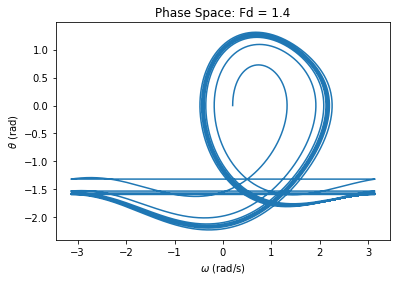

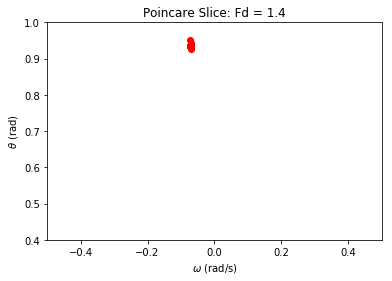

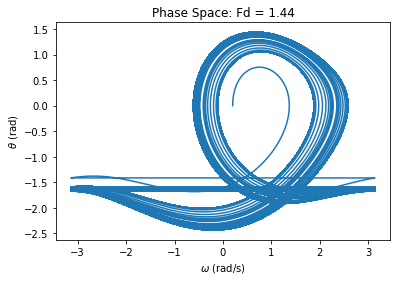

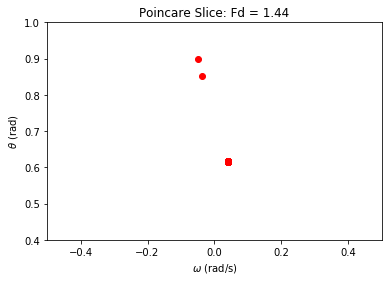

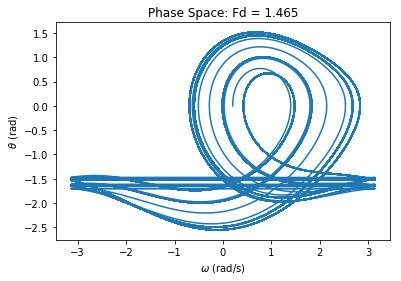

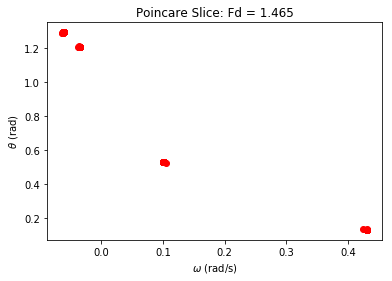

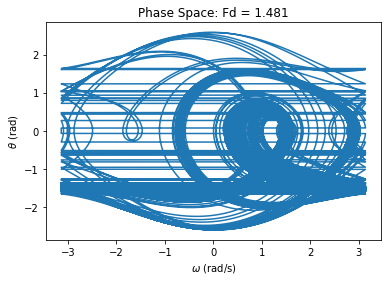

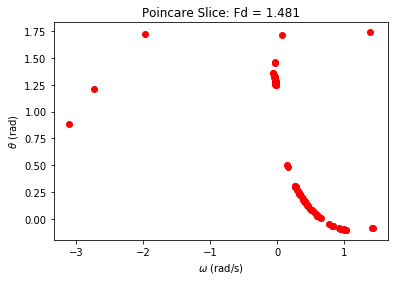

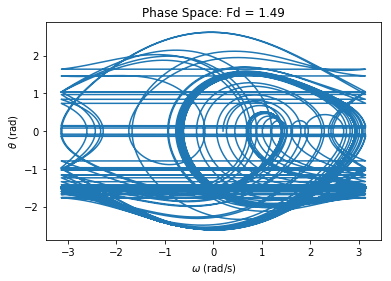

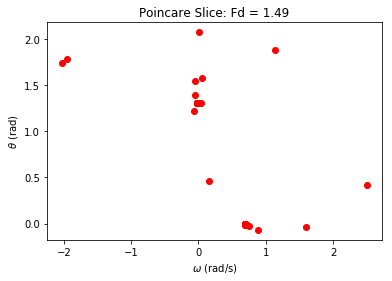

In [68]:
Fd = [1.4, 1.44, 1.465, 1.481, 1.49]

for i in(Fd):
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)
    p1 = Pendulum(nu = 0.5, Fd = i, omega_d = 2.0/3.0 , x0 = 0.2, tf = 2000, dt = 0.005)
    p1.scipy_trajectory()
    plt.plot(p1.xv[:,0],p1.xv[:,1])
    plt.ylabel('$\\theta$ (rad)')
    plt.xlabel('$\omega$ (rad/s)')
    plt.title('Phase Space: Fd = {}'.format(i))
    
    tarray_new = p1.tarray[10000:]
    x_new = p1.xv[10000:,0]
    v_new = p1.xv[10000:,1]
    

    poincare_x = []
    poincare_v = []
    for j in range(len(tarray_new)):
        if(np.mod(tarray_new[j],(2*np.pi)/p1.omega_d) < 0.5*p1.dt):
            poincare_x.append(x_new[j])
            poincare_v.append(v_new[j])
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111)
    plt.plot(poincare_x, poincare_v, 'ro')
    plt.ylabel('$\\theta$ (rad)')
    plt.xlabel('$\omega$ (rad/s)')
    plt.title('Poincare Slice: Fd = {}'.format(i))
    
    if(i == 1.4 or i == 1.44):
        plt.xlim(-0.5, 0.5)
        plt.ylim(0.4,1.0)

We can see nice repetitive behaviour for the first three phase diagrams before everything dissolves into chaos.

**Problem 3**

[]
0


Text(0.5,1,'Bifurcation Diagram')

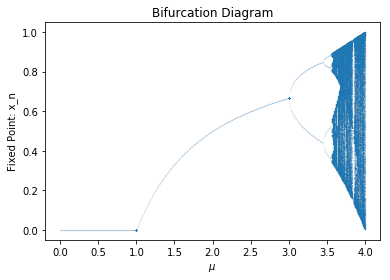

In [84]:
mus = np.arange(0.0, 4.0, 0.005)
x0 = 0.8

MU = []
unique_x = []

split = False
previous = 0
un = []

for i in mus:
    m = lm.LogisticMap(x =x0, mu = i)
    m.initialize(10000)
    m.iterate(1000)
    x_list = np.round(np.array(m.xList), 8)
    xs = np.unique(x_list)
    
    for j in xs:
        MU.append(i)
        unique_x.append(j)

MU = np.array(MU)
unique_x = np.array(unique_x)
print(un)
print(len(un))

plt.plot(MU, unique_x, '.', markersize = 0.1)
plt.xlabel('$\mu$')
plt.ylabel('Fixed Point: x_n')
plt.title('Bifurcation Diagram')

By zooming in on this graph MANY times I was able to find the points of bifurcation were at:
$\mu_{n}$ = [3.0, 3.450, 3.55, 3.5645, 3.569, 3.5697, 3.5699, 3.569935]

In [81]:
u = [3.0, 3.450, 3.545, 3.5645, 3.5688, 3.5697, 3.569895, 3.569935]

print('Figenbaum Number Calculations:')
for i in range(1,len(u)-1):
    d = (u[i]-u[i-1])/(u[i+1]-u[i])
    print(d)

Figenbaum Number Calculations:
4.736842105263172
4.871794871794896
4.534883720929995
4.777777777777339
4.615384615391798
4.874999999961142


They approach the correct value 4.6692!